# Project: Investigate a Dataset - [IMDB Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (IMDb), including user ratings, budget, revenue, popularity, movie duration, genres and release-year. 


### Questions To Answer

><a href="#one">what</a> **is the most frequently used genres**
       
><a href="#two">what</a> **genres that get highest revenue?**
        
><a href="#three">what</a> **is the rate of movies production since 1966 to 2015?**
        
><a href="#four">what</a> **is the average budget to produce a movie?**

><a href="#five">what</a> **is the most preferable movie duration? (according to votes and popularity)**

><a href="#six">Are</a> **genres with highest revenue have highest popularity ?**

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import csv

import matplotlib.pyplot as plt
%matplotlib inline

<a id="wrangling"></a>
##  Data Wrangling

### first we need to look at the file we are going to work on

In [2]:
# reading the file and explore it
file = pd.read_csv('tmdb-movies.csv')
file.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


### let's delete useless columns to make it easier

In [3]:
# deleting useless columns
df = file.drop(['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'director', 'overview', 'keywords', 'production_companies', 'release_date', 'budget_adj', 'revenue_adj'], axis=1)
df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015


### showing the type of values and the non-values  and short descriprtion of the data

In [4]:
# getting informaion about values and the non-values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   runtime         10866 non-null  int64  
 5   genres          10843 non-null  object 
 6   vote_count      10866 non-null  int64  
 7   vote_average    10866 non-null  float64
 8   release_year    10866 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 764.1+ KB


In [5]:
# showing a short descriprtion of the data
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


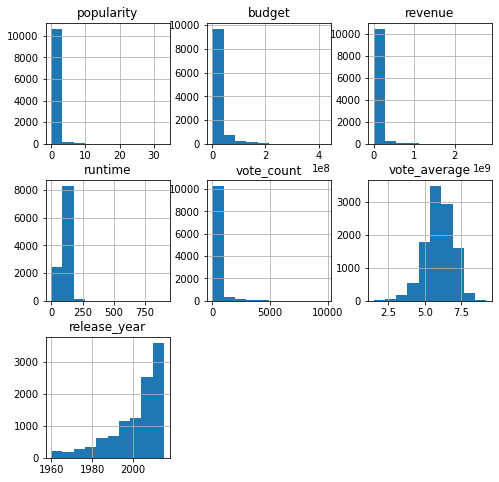

In [6]:
# the distribution of the values for each column
df.hist(figsize = (8, 8));

### Making a new dataframe that can deal with genres easily through having them seperated

In [7]:
# split genres string, at |, explode the list to rows
genres_df = df.assign(genres=df['genres'].str.split('|')).explode('genres')
genres_df.head(10)

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action,5562,6.5,2015
0,32.985763,150000000,1513528810,Jurassic World,124,Adventure,5562,6.5,2015
0,32.985763,150000000,1513528810,Jurassic World,124,Science Fiction,5562,6.5,2015
0,32.985763,150000000,1513528810,Jurassic World,124,Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,6185,7.1,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Adventure,6185,7.1,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Science Fiction,6185,7.1,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2480,6.3,2015
2,13.112507,110000000,295238201,Insurgent,119,Science Fiction,2480,6.3,2015


<a id="eda"></a>
## Exploratory Data Analysis

<a id='one'></a>
# what is the most frequently used genres?

In [8]:
# getting the value-count for each genre
gen_val = genres_df.genres.value_counts()
gen_val

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

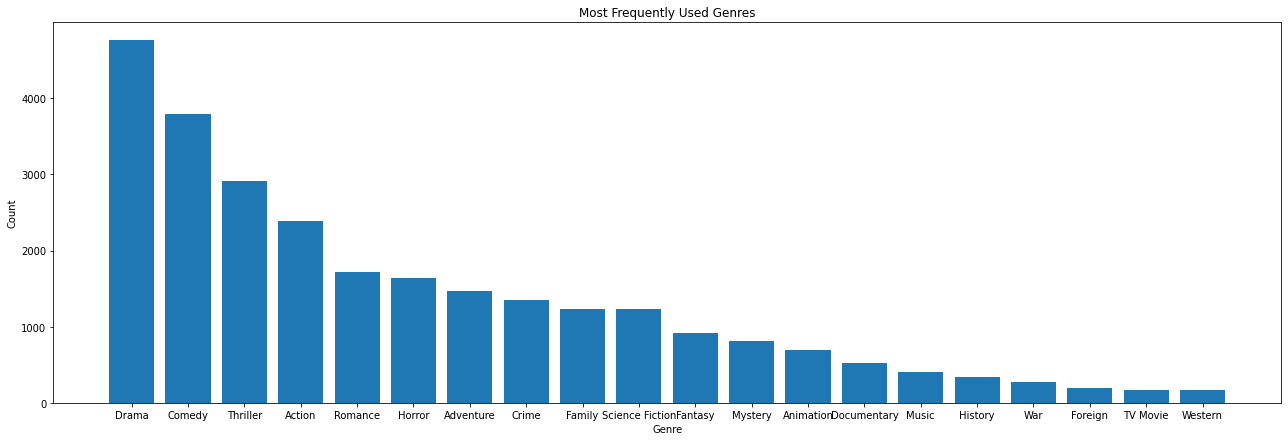

In [9]:
# bar chart between the amount of movies and genre

plt.subplots(figsize=(22,7))

plt.bar(gen_val.index,gen_val)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Most Frequently Used Genres")
plt.show();

## conclusion : the most frequently used genres are (Drama, Comedy, Thriller and then Action)

<a id='two'></a>
# what genres that get highest revenue?

In [10]:
# getting the genres assosiated with revenue
gen_rev = genres_df.groupby('genres').revenue.sum().sort_values()

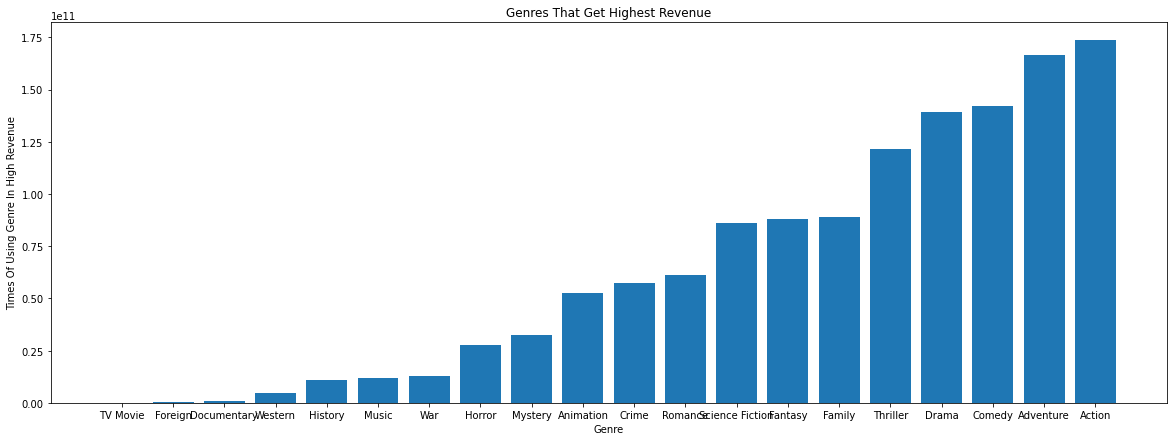

In [11]:
# bar chart between genres and genre-revenue

plt.subplots(figsize=(20,7))

plt.bar(gen_rev.index,gen_rev)
plt.xlabel("Genre")
plt.ylabel("Times Of Using Genre In High Revenue")
plt.title("Genres That Get Highest Revenue")
plt.show();

### conclusion : genres that get highest revenue are (Action, Adventure, Comedy and then Drama)

<a id='three'></a>
# what is the rate of movies production since 1966 to 2015?

In [12]:
# getting the amount of movies per year through getting how many times has each year presented in the dataframe
movies_amount = df['release_year'].value_counts().sort_index()

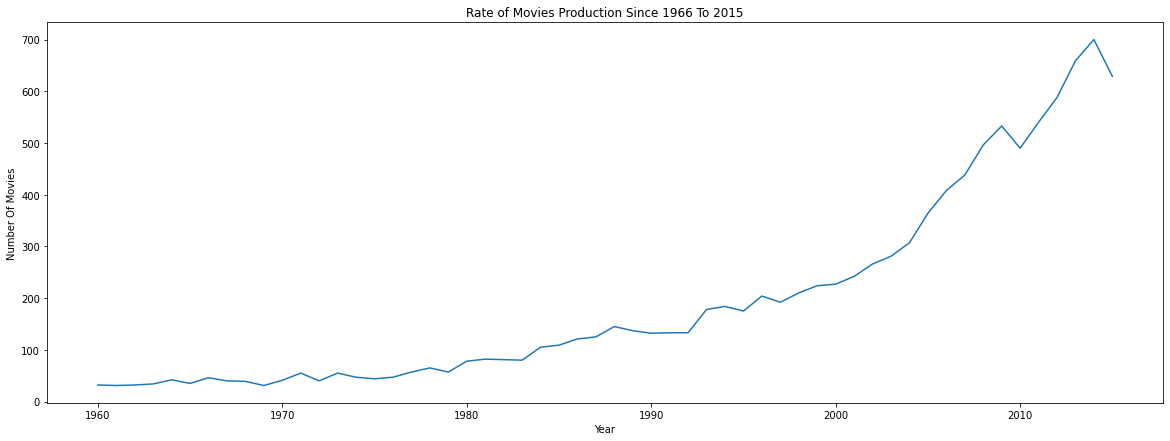

In [13]:
# plot between amount of movies and years

plt.subplots(figsize=(20,7))

plt.plot(movies_amount.index,movies_amount)
plt.xlabel('Year')
plt.ylabel('Number Of Movies')
plt.title('Rate of Movies Production Since 1966 To 2015')
plt.show();

### conclusion : the rate is severely increased especially since 2000

<a id='four'></a>
# what is the average budget to produce a movie?

### since there are alot of wierd values like (1, 3, 12) , we need to filter the data and get only the reasonable budgets, so maybe we can start from 1000$

In [14]:
# filtering budget column in a new dataframe called 'res_budget' (reasonable budget)
res_budget = df[df.budget > 1000]
res_budget

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...
10835,0.299911,12000000,20000000,The Sand Pebbles,182,Action|Adventure|Drama|War|Romance,28,7.0,1966
10841,0.264925,75000,0,The Shooting,82,Western,12,5.5,1966
10848,0.207257,5115000,12000000,Fantastic Voyage,100,Adventure|Science Fiction,42,6.7,1966
10855,0.141026,700000,0,The Ghost & Mr. Chicken,90,Comedy|Family|Mystery|Romance,14,6.1,1966


### Now let's get the average budget to produce a movie for each year

In [15]:
# getting the mean of budgets assosiated with release-year
year_budget = res_budget.groupby('release_year', as_index=False).budget.mean()
year_budget

,release_year,budget
0,1960,2.450772e+06
1,1961,3.549000e+06
2,1962,4.209385e+06
3,1963,6.666500e+06
4,1964,3.589378e+06
5,1965,7.020500e+06
6,1966,4.796233e+06
7,1967,5.920706e+06
8,1968,4.795933e+06
9,1969,4.212909e+06


### *since there is a big difference, we will take the average of the last five years*

In [16]:
# average budget for last 5 years
year_budget.budget[-5:].mean()

34835941.84416868

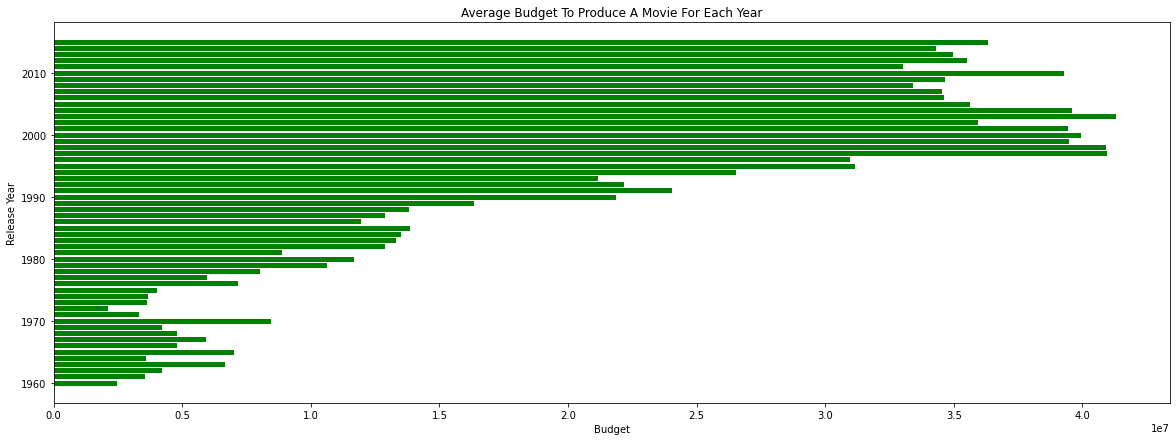

In [17]:
# bar chart between years and average budget

plt.subplots(figsize=(20,7))

plt.barh(year_budget.release_year,year_budget.budget, color='g')
plt.xlabel("Budget")
plt.ylabel("Release Year")
plt.title("Average Budget To Produce A Movie For Each Year")
plt.show();

### conclusion : the average budget to make a movie for last five years is about 34 835 941.85 $

<a id='five'></a>
# what is the most preferable movie duration? 
### (according to votes and popularity)

## *we will make three scatter plots* ( runtime with[ vote-count,  vote_average,  popularity] )

### *since we have to make three scatter plots, we can make a function for that to make it faster*

In [18]:
def myscatters(df, xVar, yVar, color='red', alpha=0.4):
    '''
    this function makes scatter plots with specific two variabels
    inputs: dataframe, first variable, second variable
    outputs: scater plot between first variable and second variable
    '''
    
    # plot
    df.plot(x= xVar, y= yVar,
            kind= 'scatter',
            color= color,
            alpha= alpha,
            figsize= [20, 7]);
    
    # title
    plt.title(f'relation ship between {yVar} and {xVar}'.title(), 
             fontsize= 14, weight="bold")
    
    # x label
    plt.xlabel(xVar.title(), 
              fontsize= 10, weight= "bold")
    
    # y label
    plt.ylabel(yVar.title(), 
              fontsize= 10, weight= "bold")

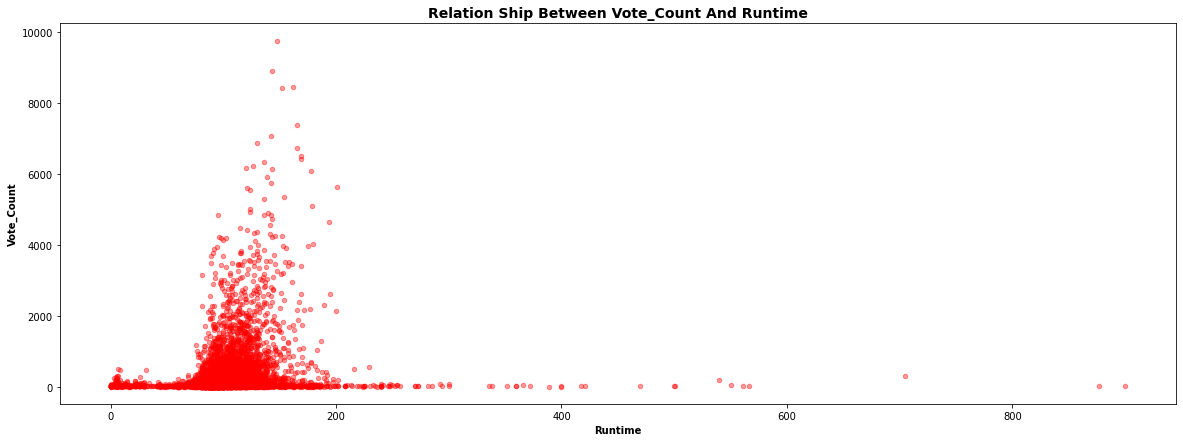

In [19]:
# scatter between runtime and vote-count
myscatters(df, "runtime", "vote_count")

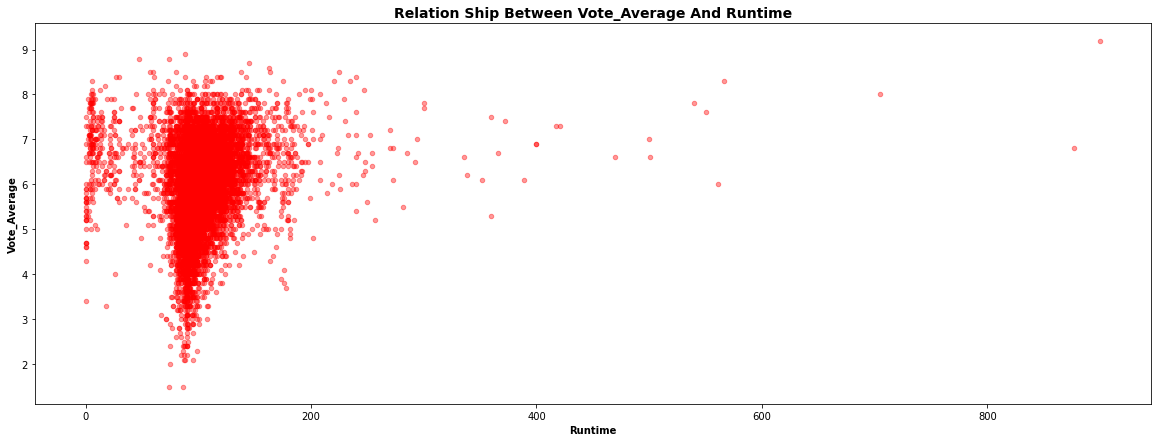

In [20]:
# scatter between runtime and vote-average
myscatters(df,'runtime', 'vote_average')

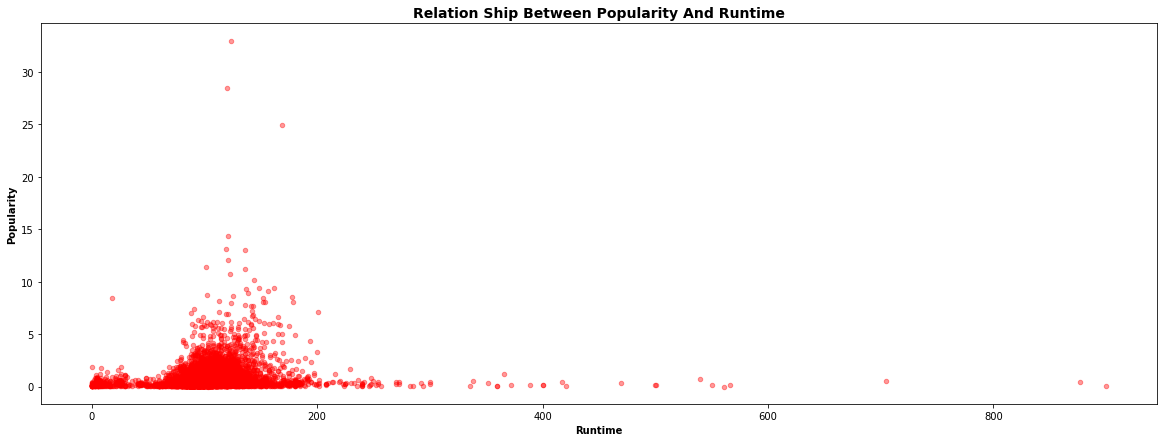

In [21]:
# scatter between runtime and popularity
myscatters(df, 'runtime', 'popularity')

### conclusion : according to the data, the most preferable duration seems to be between 100 & 180 minutes

<a id='six'></a>
# Are genres with highest revenue have highest popularity ?

### *first we are going to look at the popularity on average*

In [22]:
# popularity rates on average
ave_pop = genres_df.groupby('genres').popularity.mean().describe()
ave_pop

count    20.000000
mean      0.657829
std       0.262367
min       0.181432
25%       0.553782
50%       0.641310
75%       0.803047
max       1.154259
Name: popularity, dtype: float64

### *then we are going to look at popularity for genres with high revenue*

In [23]:
# getting the highest revenue genres
high_rev_gen = genres_df.query('genres == ["Action", "Adventure", "Comedy", "Drama", "Thriller"] ')

In [24]:
# popularity rates for high revenue movies
high_rev_pop = high_rev_gen.groupby('genres').popularity.mean().describe()
high_rev_pop

count    5.000000
mean     0.801202
std      0.240473
min      0.591496
25%      0.592607
50%      0.741513
75%      0.926136
max      1.154259
Name: popularity, dtype: float64

### *now let's see the difference between them*

In [25]:
high_rev_pop - ave_pop

count   -15.000000
mean      0.143374
std      -0.021894
min       0.410065
25%       0.038825
50%       0.100203
75%       0.123089
max       0.000000
Name: popularity, dtype: float64

### conclusion : according to the data the answer seems to be yes, genres with highest revenue have highest popularity

<a id='conclusions'></a>
# **Conclusions**

*the research is giving an answer to the quistions belew :*

**what is the most frequently used genres ?**

>the most frequently used genres are **(Drama, Comedy, Thriller and then Action)**

**what genres that get highest revenue ?**
>genres that get highest revenue are **(Action, Adventure, Comedy and then Drama)**

**what is the rate of movies production since 1966 to 2015 ?**
>the rate is **severely increased** especially  since 2000

**what is the average budget to produce a movie ?**
> the average budget to make a movie for last five years is about **34 835 941.85 $**

**what is the most preferable movie duration ?**
>according to the data, the most preferable duration seems to be between **100 & 180 minutes**

**Are genres with highest revenue have highest popularity ?**
>according to the data the answer seems to be **yes**, genres with highest revenue have highest popularity

## *limitations:*

#### there are alot of **missing data** in the budget column and revenue column which made it harder to specify the relations between them and the other variables

#### genres that get highest revenue can be **not quite** because those genres are most frequently produced so it's expected to get highest total revenue per year